# Supermarket Sales Analysis
Dataset ini merepresentasikan data penjualan dari sebuah supermarket, yang terdapat informasi detail terkait transaksi individu pelanggan di 3 cabang selama 3 bulan. Setiap baris sesuai dengan satu transaksi penjualan yang diselesaikan, termasuk detail produk, karakteristik pelanggan, metode pembayaran, nilai penjualan, dan peringkat kepuasan pelanggan.
## Tujuan
1. Menganalisa performa penjualan berdasarkan cabang dan kategori produk.
2. Memahami perilaku pembelian pelanggan.
3. Mengidentifikasi penjualan berdasarkan pola waktu.
## Informasi Atribut
1. Invoice ID: Nomor ID untuk tiap transaksi
2. Branch: Cabang dari supermarket (A, B, &C)
3. City: Lokasi supermarket
4. Customer type: Tipe pelanggan (Member & Normal)
5. Gender: Jenis kelamin pelanggan
6. Product line: Kategori produk (e.g. Makanan dan minuman, Aksesoris elektronik, etc)
7. Unit price: Harga satuan produk
8. Quantity: Jumlah produk yang dibeli
9. Tax 5%: Biaya pajak untuk setiap pembelian
10. Total: Harga total termasuk pajak
11. Date: Tanggal transaksi
12. Time: Waktu transaksi
13. Payment: Metode pembayaran yang digunakan (Cash, Credit card, E-Wallet)
14. COGS: Harga pokok penjualan
15. Gross margin percentage: Persentase margin kotor
16. Gross income: Pendapatan kotor
17. Rating: Penilaian kepuasan pelanggan


## Import Libraries


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [5]:
file_path = "/content/Supermarket Sales Cleaned.csv"

df = pd.read_csv(file_path)

df.head()

print("Shape:", df.shape)

print("Columns:", df.columns.tolist())

df.info()

Shape: (1000, 20)
Columns: ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating', 'Day', 'Month', 'Year']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-n

## Exploratory Data Analysis

### Statistik keseluruhan

In [6]:
# Hitung statistik
total_revenue = df['Total'].sum()
average_transaction_value = df['Total'].mean()
average_rating = df['Rating'].mean()
total_quantity_sold = df['Quantity'].sum()

# Tampilkan
print(f"Total pendapatan: ${total_revenue:,.2f}")
print(f"Nilai transaksi rata-rata : ${average_transaction_value:,.2f}")
print(f"Rating rata-rata: {average_rating:.2f}")
print(f"Jumlah produk terjual: {total_quantity_sold:,.0f}")

Total pendapatan: $322,966.75
Nilai transaksi rata-rata : $322.97
Rating rata-rata: 6.97
Jumlah produk terjual: 5,510


### Penjualan berdasarkan Cabang dan Kategori Produk

#### Total Pendapatan & Laba berdasarkan Cabang


In [7]:
branch_performance = (
    df.groupby("Branch")
      .agg(
          Total_Revenue=("Total", "sum"),
          Total_Profit=("gross income", "sum"),
          Total_Quantity=("Quantity", "sum")
      )
      .reset_index()
)

branch_performance


,Branch,Total_Revenue,Total_Profit,Total_Quantity
0,A,106200.3705,5057.1605,1859
1,B,106197.6720,5057.0320,1820
2,C,110568.7065,5265.1765,1831


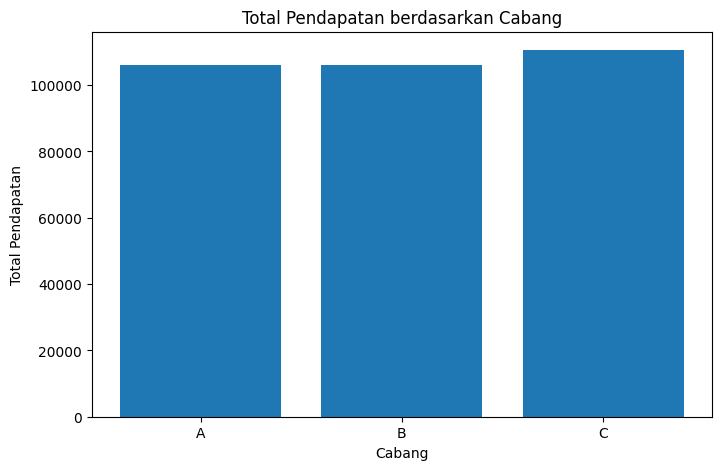

In [8]:
plt.figure(figsize=(8, 5))
plt.bar(branch_performance["Branch"], branch_performance["Total_Revenue"])
plt.title("Total Pendapatan berdasarkan Cabang")
plt.xlabel("Cabang")
plt.ylabel("Total Pendapatan")
plt.show()


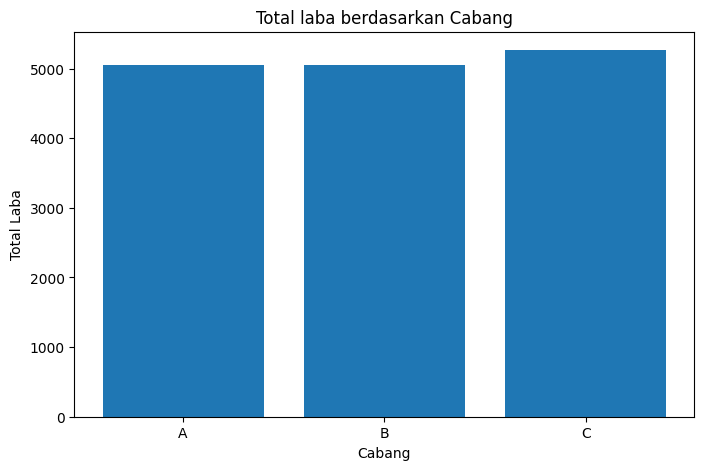

In [9]:
plt.figure(figsize=(8, 5))
plt.bar(branch_performance["Branch"], branch_performance["Total_Profit"])
plt.title("Total laba berdasarkan Cabang")
plt.xlabel("Cabang")
plt.ylabel("Total Laba")
plt.show()

#### Total Pendapatan & Laba berdasarkan Kategori Produk

In [10]:
product_performance = (
    df.groupby("Product line")
      .agg(
          Total_Revenue=("Total", "sum"),
          Total_Profit=("gross income", "sum"),
          Total_Quantity=("Quantity", "sum")
      )
      .reset_index()
      .sort_values(by="Total_Revenue", ascending=False)
)

product_performance


,Product line,Total_Revenue,Total_Profit,Total_Quantity
2,Food and beverages,56144.8440,2673.5640,952
5,Sports and travel,55122.8265,2624.8965,920
0,Electronic accessories,54337.5315,2587.5015,971
1,Fashion accessories,54305.8950,2585.9950,902
4,Home and lifestyle,53861.9130,2564.8530,911
3,Health and beauty,49193.7390,2342.5590,854


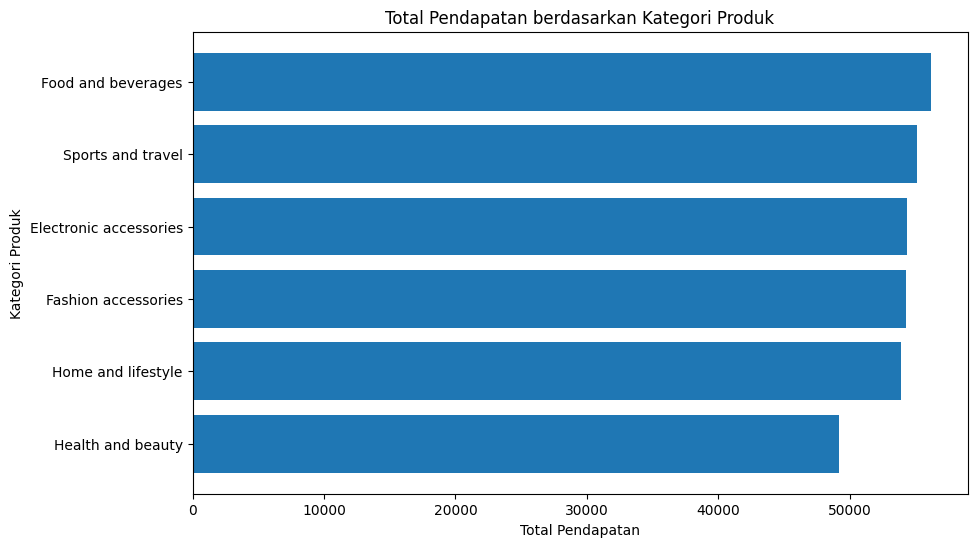

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(product_performance["Product line"], product_performance["Total_Revenue"])
plt.title("Total Pendapatan berdasarkan Kategori Produk")
plt.xlabel("Total Pendapatan")
plt.ylabel("Kategori Produk")
plt.gca().invert_yaxis()
plt.show()


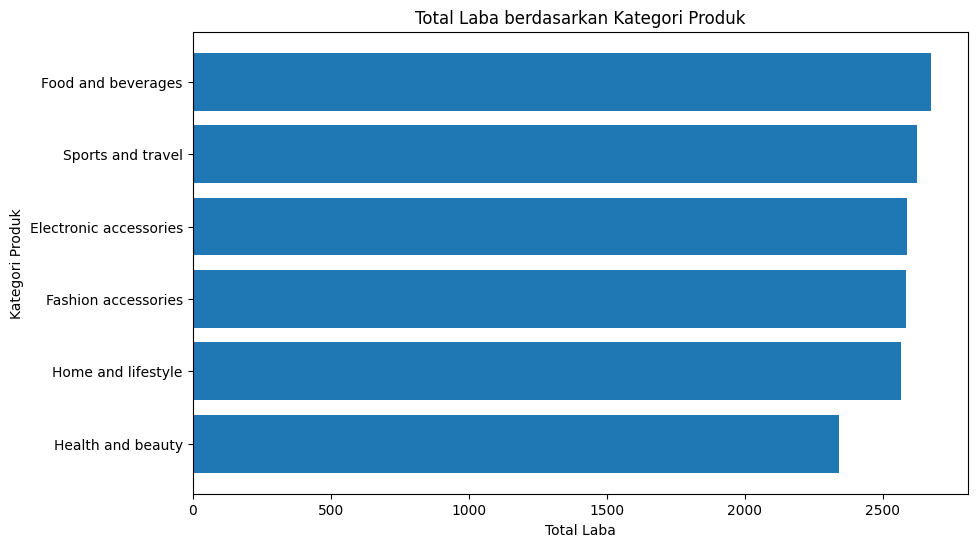

In [12]:
plt.figure(figsize=(10, 6))
plt.barh(product_performance["Product line"], product_performance["Total_Profit"])
plt.title("Total Laba berdasarkan Kategori Produk")
plt.xlabel("Total Laba")
plt.ylabel("Kategori Produk")
plt.gca().invert_yaxis()
plt.show()

#### Performa Kategori Produk berdasarkan Cabang

In [13]:
branch_product_performance = (
    df.groupby(["Branch", "Product line"])
      .agg(
          Total_Revenue=("Total", "sum"),
          Total_Profit=("gross income", "sum")
      )
      .reset_index()
)

branch_product_performance.head()


,Branch,Product line,Total_Revenue,Total_Profit
0,A,Electronic accessories,18317.1135,872.2435
1,A,Fashion accessories,16332.5085,777.7385
2,A,Food and beverages,17163.1005,817.2905
3,A,Health and beauty,12597.7530,599.8930
4,A,Home and lifestyle,22417.1955,1067.4855


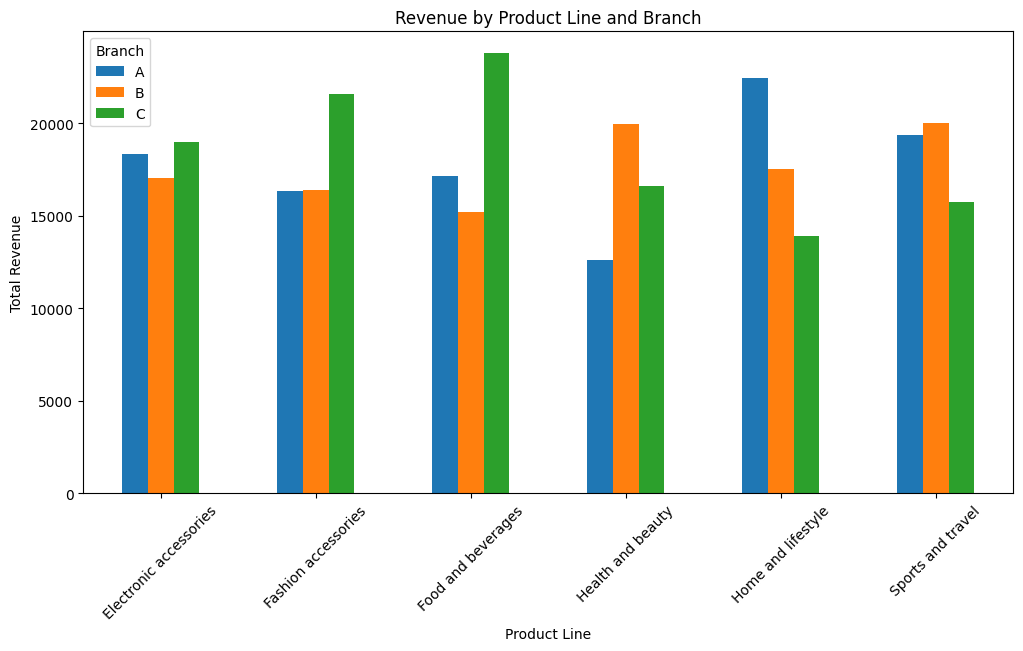

In [14]:
pivot_branch_product = branch_product_performance.pivot(
    index="Product line",
    columns="Branch",
    values="Total_Revenue"
)

pivot_branch_product.plot(
    kind="bar",
    figsize=(12, 6)
)

plt.title("Revenue by Product Line and Branch")
plt.xlabel("Product Line")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


#### Analisis


Cabang C menghasilkan total pendapatan dan laba tertinggi, menunjukkan kinerja penjualan yang lebih kuat dibandingkan cabang lainnya. Di antara kategori-kategori produk, Makanan dan Minuman memberikan kontribusi pendapatan terbesar, sehingga menunjukkan bahwa makanan dan minuman merupakan pendorong utama penjualan supermarket di seluruh cabang.

### Analisis Tipe Pelanggan

#### Member vs Normal

In [15]:
customer_type_performance = (
    df.groupby("Customer type")
      .agg(
          Total_Revenue=("Total", "sum"),
          Average_Transaction_Value=("Total", "mean"),
          Total_Quantity=("Quantity", "sum"),
          Average_Rating=("Rating", "mean")
      )
      .reset_index()
)

customer_type_performance


,Customer type,Total_Revenue,Average_Transaction_Value,Total_Quantity,Average_Rating
0,Member,164223.444,327.791305,2785,6.940319
1,Normal,158743.305,318.122856,2725,7.005210


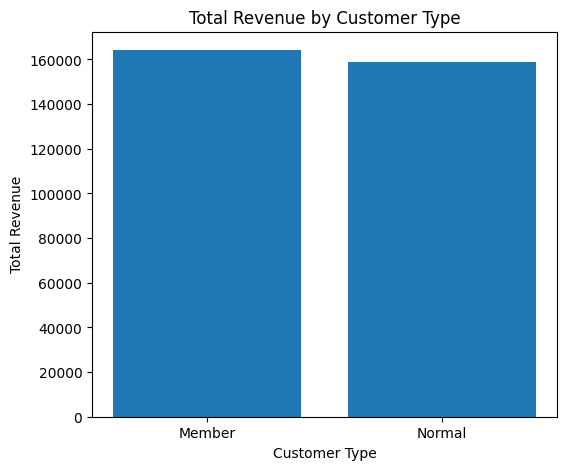

In [16]:
plt.figure(figsize=(6, 5))
plt.bar(customer_type_performance["Customer type"],
        customer_type_performance["Total_Revenue"])
plt.title("Total Revenue by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Total Revenue")
plt.show()


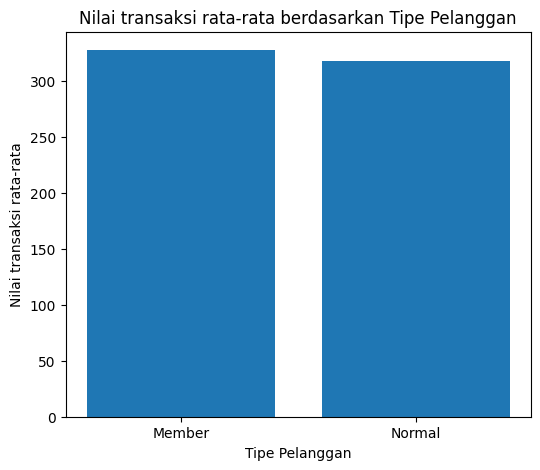

In [17]:
plt.figure(figsize=(6, 5))
plt.bar(customer_type_performance["Customer type"],
        customer_type_performance["Average_Transaction_Value"])
plt.title("Nilai transaksi rata-rata berdasarkan Tipe Pelanggan")
plt.xlabel("Tipe Pelanggan")
plt.ylabel("Nilai transaksi rata-rata")
plt.show()


#### Jenis Kelamin


In [18]:
gender_performance = (
    df.groupby("Gender")
      .agg(
          Total_Revenue=("Total", "sum"),
          Average_Transaction_Value=("Total", "mean"),
          Total_Quantity=("Quantity", "sum")
      )
      .reset_index()
)

gender_performance


,Gender,Total_Revenue,Average_Transaction_Value,Total_Quantity
0,Female,167882.925,335.095659,2869
1,Male,155083.824,310.789226,2641


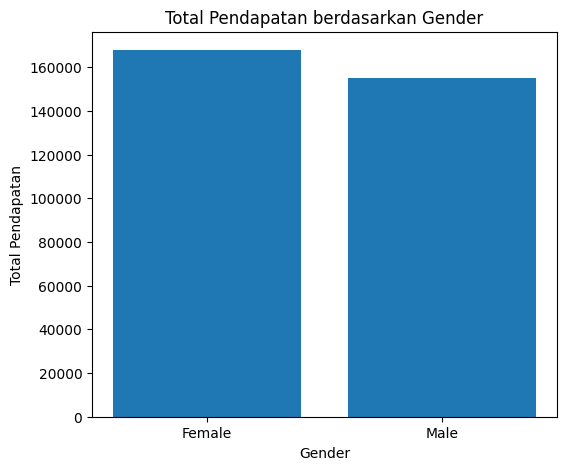

In [19]:
plt.figure(figsize=(6, 5))
plt.bar(gender_performance["Gender"],
        gender_performance["Total_Revenue"])
plt.title("Total Pendapatan berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Total Pendapatan")
plt.show()


#### Metode Pembayaran

In [20]:
payment_performance = (
    df.groupby("Payment")
      .agg(
          Total_Revenue=("Total", "sum"),
          Number_of_Transactions=("Invoice ID", "count")
      )
      .reset_index()
      .sort_values(by="Total_Revenue", ascending=False)
)

payment_performance


,Payment,Total_Revenue,Number_of_Transactions
0,Cash,112206.570,344
2,Ewallet,109993.107,345
1,Credit card,100767.072,311


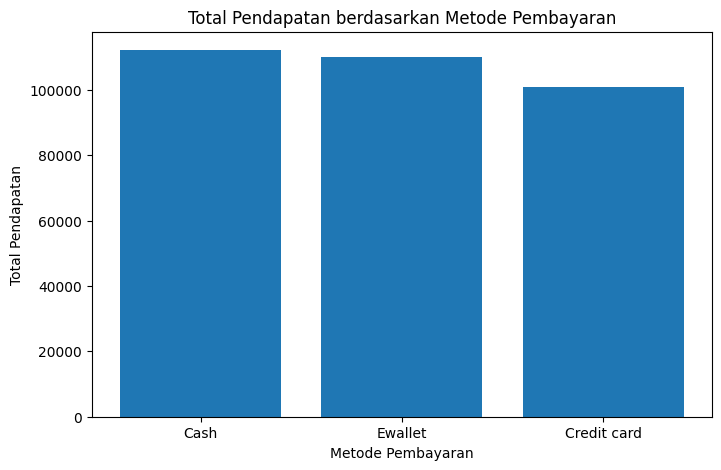

In [21]:
plt.figure(figsize=(8, 5))
plt.bar(payment_performance["Payment"],
        payment_performance["Total_Revenue"])
plt.title("Total Pendapatan berdasarkan Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Total Pendapatan")
plt.show()


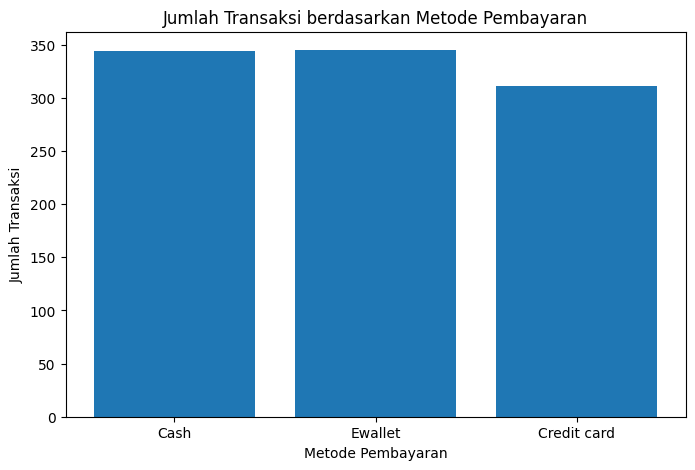

In [22]:
plt.figure(figsize=(8, 5))
plt.bar(payment_performance["Payment"],
        payment_performance["Number_of_Transactions"])
plt.title("Jumlah Transaksi berdasarkan Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()


#### Tipe Pelanggan dan Jenis Kelamin

In [23]:
customer_gender_performance = (
    df.groupby(["Customer type", "Gender"])
      .agg(
          Total_Revenue=("Total", "sum"),
          Average_Transaction_Value=("Total", "mean")
      )
      .reset_index()
)

customer_gender_performance


,Customer type,Gender,Total_Revenue,Average_Transaction_Value
0,Member,Female,88146.9435,337.727753
1,Member,Male,76076.5005,316.985419
2,Normal,Female,79735.9815,332.233256
3,Normal,Male,79007.3235,305.047581


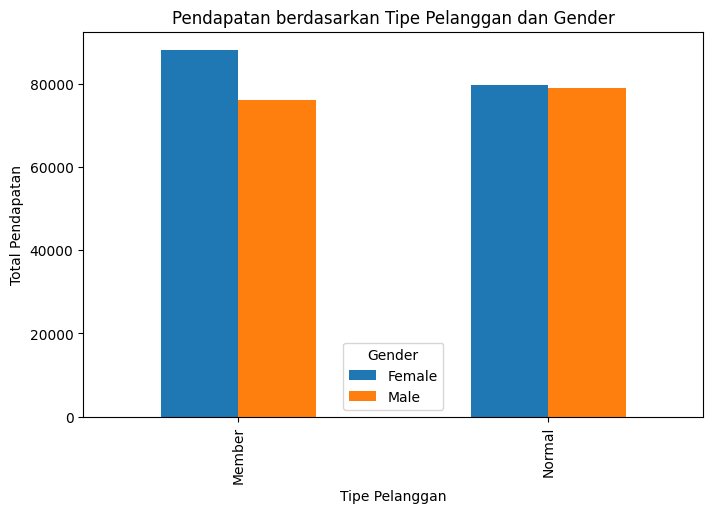

In [24]:
pivot_customer_gender = customer_gender_performance.pivot(
    index="Customer type",
    columns="Gender",
    values="Total_Revenue"
)

pivot_customer_gender.plot(
    kind="bar",
    figsize=(8, 5)
)

plt.title("Pendapatan berdasarkan Tipe Pelanggan dan Gender")
plt.xlabel("Tipe Pelanggan")
plt.ylabel("Total Pendapatan")
plt.show()


Pelanggan member menyumbang bagian lebih tinggi dari total pendapatan dan memiliki rata-rata nilai transaksi lebih tinggi dibandingkan pelanggan normal. Hal ini menunjukkan bahwa program loyalitas efektif dalam meningkatkan belanja pelanggan. Selain itu, metode pembayaran digital menyumbang porsi transaksi yang signifikan, sehingga menunjukkan adanya preferensi terhadap pembayaran non-tunai.

### Penjualan berdasarkan Pola Waktu

#### Bulanan

In [25]:
monthly_sales = (
    df.groupby("Month")
      .agg(
          Total_Revenue=("Total", "sum"),
          Total_Profit=("gross income", "sum"),
          Number_of_Transactions=("Invoice ID", "count")
      )
      .reset_index()
)

month_name = {
    1: 'Januari',
    2: 'Februari',
    3: 'Maret'
}

monthly_sales['Month'] = monthly_sales['Month'].map(month_name)

monthly_sales

,Month,Total_Revenue,Total_Profit,Number_of_Transactions
0,Januari,116291.868,5537.708,352
1,Februari,97219.374,4629.494,303
2,Maret,109455.507,5212.167,345


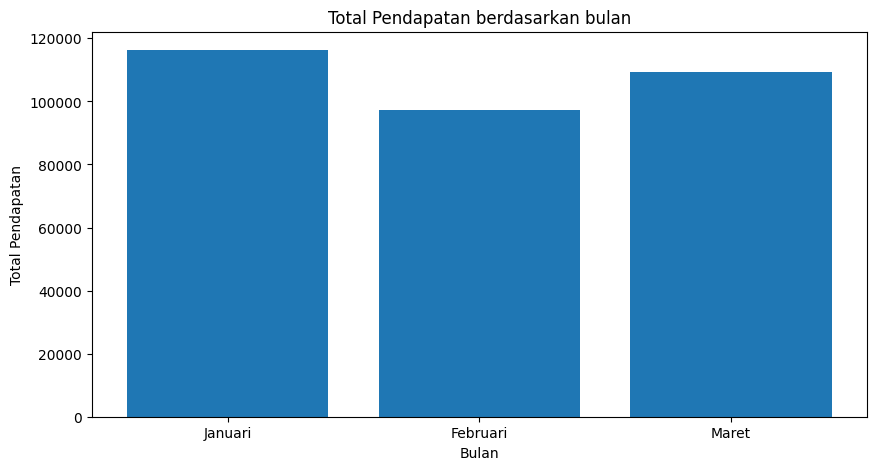

In [26]:
plt.figure(figsize=(10, 5))
plt.bar(monthly_sales["Month"], monthly_sales["Total_Revenue"])
plt.title("Total Pendapatan berdasarkan bulan")
plt.xlabel("Bulan")
plt.ylabel("Total Pendapatan")
plt.show()


#### Harian

In [27]:
daily_sales = (
    df.groupby("Day")
      .agg(
          Total_Revenue=("Total", "sum"),
          Number_of_Transactions=("Invoice ID", "count")
      )
      .reset_index()
)

daily_sales


,Day,Total_Revenue,Number_of_Transactions
0,1,9824.0835,28
1,2,12646.7565,40
2,3,12399.2295,36
3,4,7957.6245,29
4,5,12798.6915,41
5,6,9612.2250,33
6,7,11500.7130,38
7,8,13503.7770,41
8,9,13767.2850,37
9,10,9865.2015,32


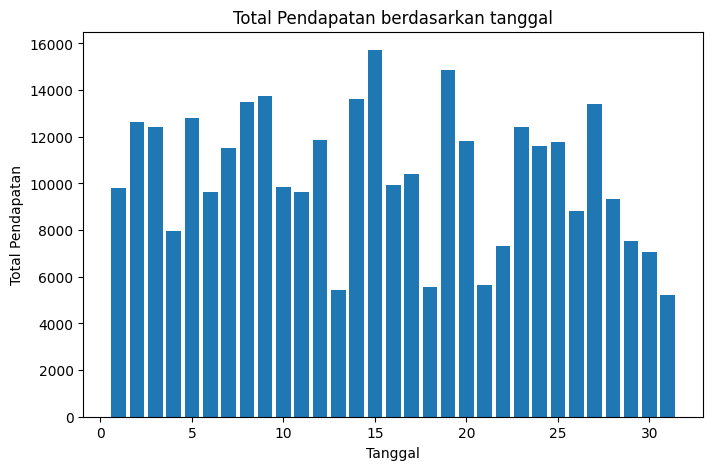

In [28]:
plt.figure(figsize=(8, 5))
plt.bar(daily_sales["Day"], daily_sales["Total_Revenue"])
plt.title("Total Pendapatan berdasarkan tanggal")
plt.xlabel("Tanggal")
plt.ylabel("Total Pendapatan")
plt.show()


#### Bulanan dan Harian

In [29]:
pivot_month_day = df.pivot_table(
    values="Total",
    index="Month",
    columns="Day",
    aggfunc="sum"
)

pivot_month_day


Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
1,4745.1810,1945.5030,2078.1285,1623.6885,3536.6835,3614.2050,2834.2440,5293.7325,3021.3435,3560.9490,...,1704.7695,5994.1875,5402.0505,4700.3670,4457.5125,4635.8970,4999.7115,3516.5655,2558.2620,5232.4965
2,2444.5365,4140.9480,5467.9275,2439.4965,3031.1295,2905.4235,7228.2105,5084.6565,3271.8945,3141.0225,...,2442.3105,2339.5890,2722.4610,4807.2360,2408.1645,5859.4515,2097.0180,NaN,NaN,NaN
3,2634.3660,6560.3055,4853.1735,3894.4395,6230.8785,3092.5965,1438.2585,3125.3880,7474.0470,3163.2300,...,3179.1480,4095.0420,3477.4635,2272.9665,1962.5130,2902.8195,2229.4020,4023.2430,4487.0595,NaN


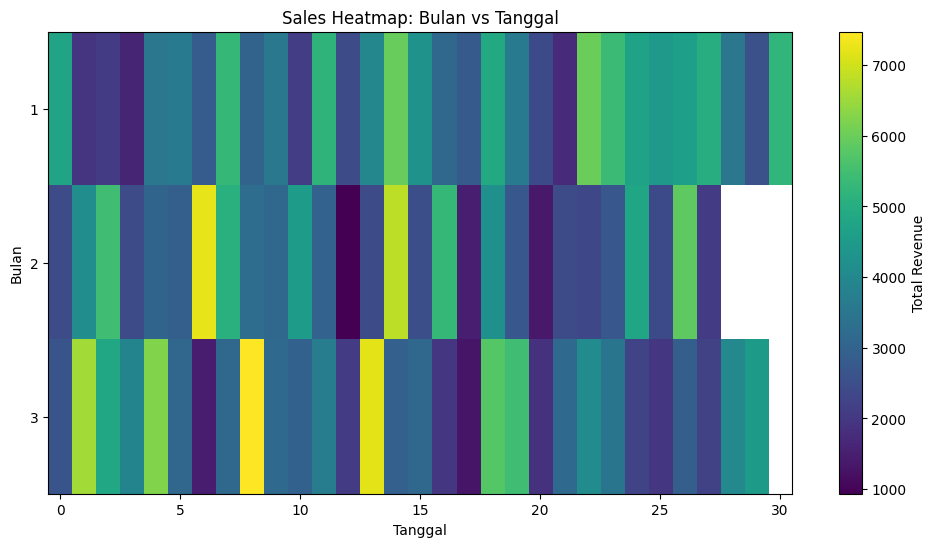

In [30]:
plt.figure(figsize=(12, 6))
plt.imshow(pivot_month_day, aspect="auto")
plt.colorbar(label="Total Revenue")
plt.title("Sales Heatmap: Bulan vs Tanggal")
plt.xlabel("Tanggal")
plt.ylabel("Bulan")
plt.yticks(range(len(pivot_month_day.index)), pivot_month_day.index)
plt.show()


Performa penjualan sangat bervariasi, dengan bulan-bulan tertentu secara konsisten menghasilkan pendapatan yang lebih tinggi. Analisis harian juga menunjukkan perbedaan yang jelas dalam volume penjualan, yang menunjukkan peluang untuk mengoptimalkan staf, tingkat inventaris, dan waktu promosi selama periode puncak.

### Kesimpulan



*   Hasil analisis menunjukkan bahwa kontribusi pendapatan dan profit berbeda antar cabang dan product line, di mana beberapa cabang dan kategori produk menjadi penggerak utama penjualan.

* Dari sisi pelanggan, customer tipe Member cenderung memiliki nilai transaksi yang lebih tinggi dibandingkan customer Normal, yang menunjukkan bahwa program loyalitas berperan penting dalam meningkatkan penjualan.

* Preferensi metode pembayaran menunjukkan pergeseran ke arah pembayaran non-tunai, yang mencerminkan perubahan perilaku pelanggan dan peluang peningkatan efisiensi proses pembayaran.

* Analisis berbasis waktu mengungkap adanya pola penjualan yang konsisten pada periode tertentu, baik berdasarkan bulan maupun hari, yang dapat dimanfaatkan untuk perencanaan operasional dan promosi.